# Zomato-Restaurants-Rating-Prediction 

# 1. Data Cleaning

In [286]:
## importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [287]:
## loading the Zomato dataset

df = pd.read_csv("/Users/mac/Desktop/Desktop_Files/Projects/Zomato Restaurant Rating Prediction /data/zomato.csv")

In [288]:
df.shape

(51717, 17)

setting option to show all columns of the dataset

In [289]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [290]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [291]:
df.tail(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [292]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [293]:
df.count()

url                            51717
address                        51717
name                           51717
online_order                   51717
book_table                     51717
rate                           43942
votes                          51717
phone                          50509
location                       51696
rest_type                      51490
dish_liked                     23639
cuisines                       51672
approx_cost(for two people)    51371
reviews_list                   51717
menu_item                      51717
listed_in(type)                51717
listed_in(city)                51717
dtype: int64

In [294]:
## Checking for Null

df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### Columns with Null Value->
- rate -> 7775 
- phone -> 1208
- location -> 21
- rest_type -> 227
- dish_liked -> 28078 (>50% is nan value)
- cuisines -> 45
- approx_cost(for two people) -> 346

In [295]:
## Printing the null values for each column in percentage
missing_percent = np.round(df.isnull().sum()/len(df)*100,2)
print(f"% Data Missing -> \n {missing_percent}")

% Data Missing -> 
 url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.03
votes                           0.00
phone                           2.34
location                        0.04
rest_type                       0.44
dish_liked                     54.29
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64


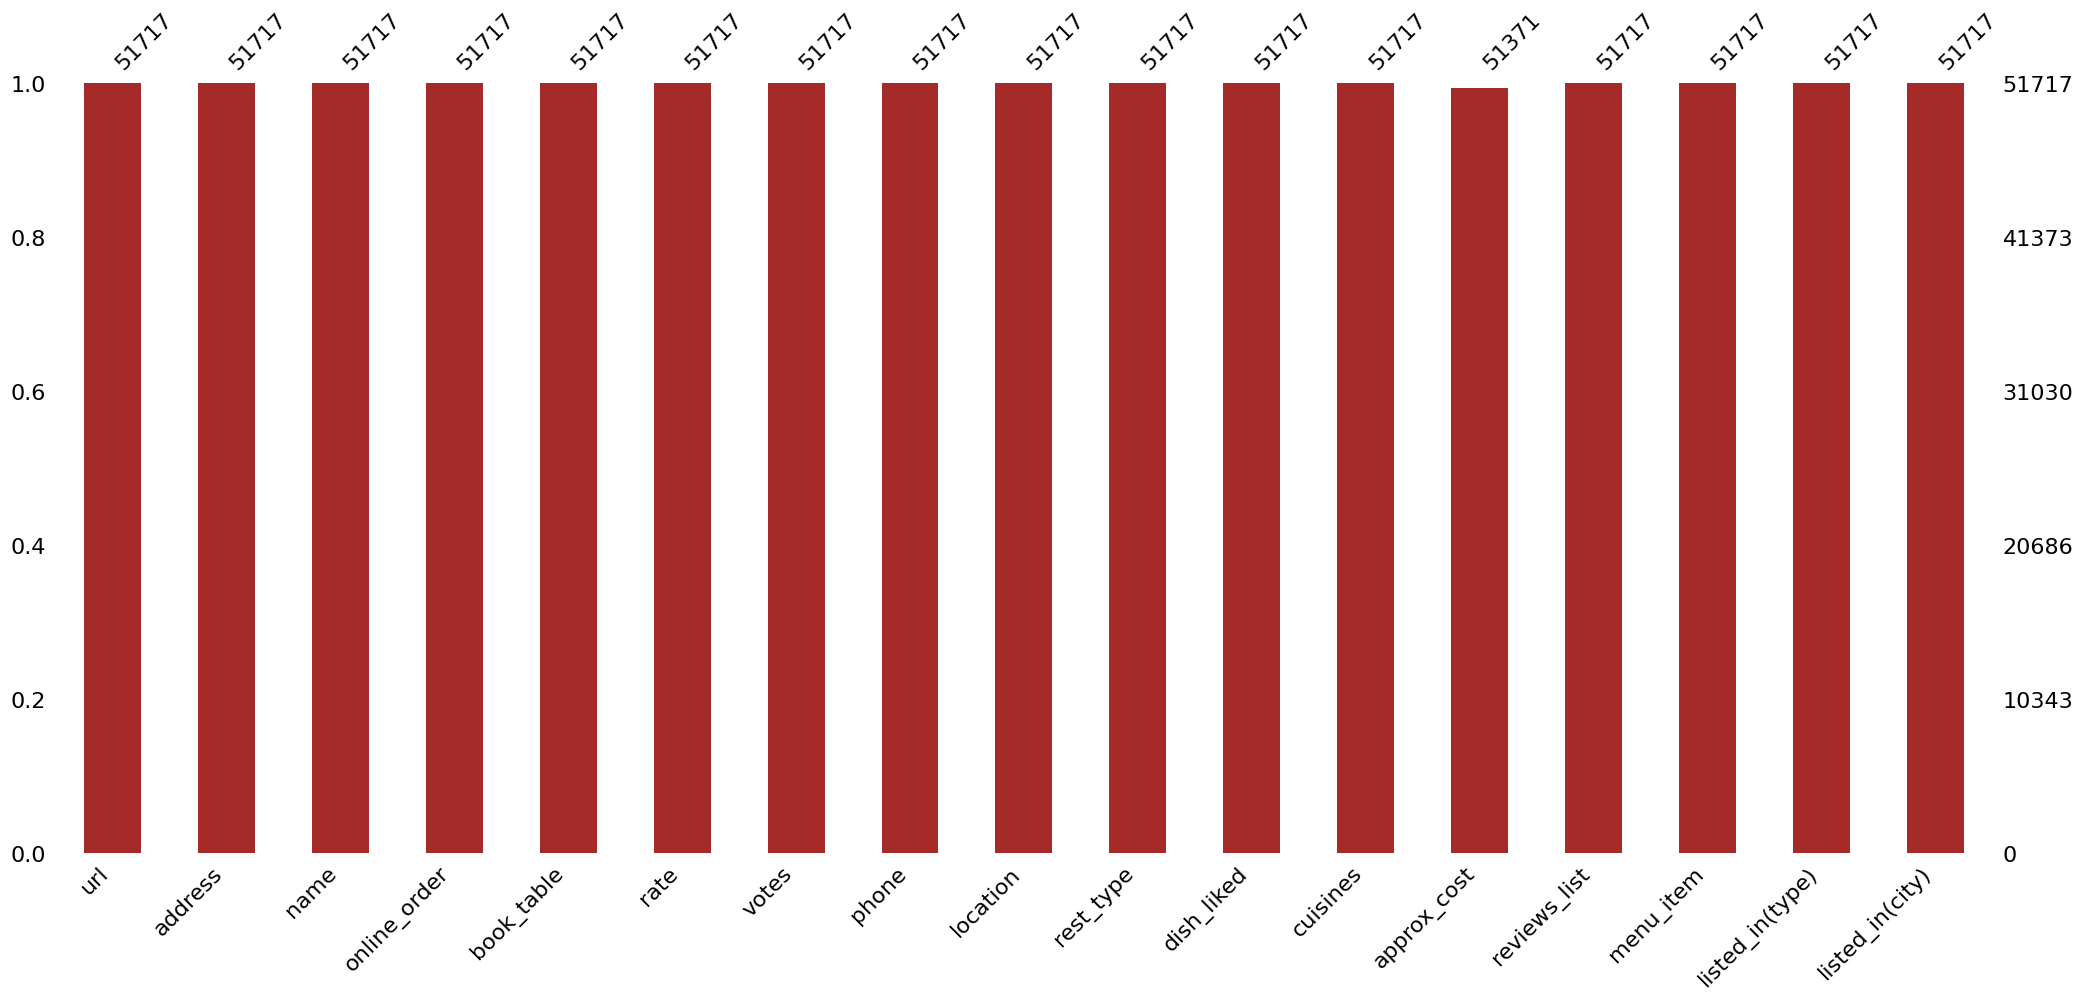

In [353]:
import missingno as msno
msno.bar(df,color='brown')
plt.show()

## Handling NaN values

In [296]:
## Rate column -> 15% nan value
print(df['rate'].unique())


['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


In [297]:
## replacing 'nan' and '-' with blank for now

df['rate'] = df['rate'].replace(np.nan, '',regex=True)
df['rate'] = df['rate'].replace('-','', regex=True)

In [298]:
print(df['rate'].unique())

['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' ''
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


In [299]:
## Handling nan for Votes column 
df['votes'].dtype
df['votes'].isnull().sum()
# oh, no nan in this

np.int64(0)

In [300]:
## Phone column NaN handling
mask = df['phone'].unique()
mask = pd.DataFrame(mask)
print(mask)

                                             0
0               080 42297555\r\n+91 9743772233
1                                 080 41714161
2                               +91 9663487993
3                               +91 9620009302
4             +91 8026612447\r\n+91 9901210005
5             +91 9980040002\r\n+91 9980063005
6               +91 9731716688\r\n080 26740366
7                 080 48653961\r\n080 48655715
8             +91 8884135549\r\n+91 9449449316
9             +91 9945230807\r\n+91 9743804471
10              080 26724489\r\n+91 7406048982
11                              +91 9742166777
12                              +91 9731644212
13                                080 49577715
14              080 26768182\r\n+91 9845704455
15            +91 9972988038\r\n+91 9900121238
16              080 26711554\r\n+91 9741406338
17                              +91 8884726600
18                              +91 9880594520
19            +91 9880016665\r\n+91 8217311687
20           

- some wierd foramtted phone numbers are listed in the dataset like->
    080 65975430\r\n+91 7337733798,  080 26600704\r\n+91 9342593424, +91 9739549643\n+91 7892657455
 - might be bcz of scraping, some codes gets inserted into the main dataset

In [301]:
## if phone column has values other than starting with '+' and integer(0 to 9)->

df[~df['phone'].str.contains('[0-9+]',na=False)]
# unique phone values other than + , (0-9)->
df[~df['phone'].str.contains('[0-9+]',na=False)]['phone'].unique()



array([nan], dtype=object)

- has too much 'nan' 

In [337]:
## replacin nan in phone column with 
df['phone'] = df['phone'].replace(np.nan, '',regex=True)
# checking->
df[~df['phone'].str.contains('[0-9+]',na=False)]['phone'].unique() # '' will be our mark for nan values🙂
## any null check->
df['phone'].isnull().sum() # done

np.int64(0)

In [339]:
## Handling weird phone number listings->
# (used Chat_GPT)
df['phone'] = df['phone'].str.replace('[^\+0-9\r\n\s]','') # will replace all those phone number that contains letters other than space character, 0-9, \r, \n, plus(+) with blank. 
# Checking->
df['phone'].str.contains('[^\+0-9\r\n\s]',na = False).sum()

np.int64(0)

In [303]:
## location column 
df['location'].unique()
df[df['location'].isnull()]['location'].unique() ## 21 nan values

array([nan], dtype=object)

In [304]:
## replacing location column's nan with '' 
df['location'] = df['location'].replace(np.nan, '', regex=True) 
# checking->
df[df['location'].isnull()]['location'].unique() # done

array([], dtype=object)

In [305]:
## (rest_type) restaurant type column nan handling
df['rest_type'].unique()
#df['rest_type'].isnull().sum()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [306]:
## replacing with nan again->
df['rest_type'] = df['rest_type'].replace(np.nan, '', regex=True)
# checking->
df['rest_type'].isnull().sum() # done

np.int64(0)

- dish_liked column has too much nan to handle, better we drop this column but for now lets keep everything akigned and just replace nans with '' 

In [307]:
## Dish_Liked column (too much nan)
df['dish_liked'].unique().tolist() # mouth watered btw,

['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
 'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
 'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
 'Masala Dosa',
 'Panipuri, Gol Gappe',
 'Onion Rings, Pasta, Kadhai Paneer, Salads, Salad, Roti, Jeera Rice',
 nan,
 'Farmhouse Pizza, Chocolate Banana, Virgin Mojito, Pasta, Paneer Tikka, Lime Soda, Prawn Pizza',
 'Pizza, Mocktails, Coffee, Nachos, Salad, Pasta, Sandwiches',
 'Waffles, Pasta, Coleslaw Sandwich, Choco Waffle, Tacos, Momos, Cheese Nachos',
 'Waffles, Pasta, Crispy Chicken, Honey Chilli Chicken, Sandwich, Coffee, Crepe',
 'Mocktails, Peri Fries, Lasagne, Pizza, Chicken Bbq Wings, Virgin Mojito, Nachos',
 'Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sandwich, Garlic Bread',
 'Sandwich, Omelette, Ice Tea, Virgin Mojito, Hot Chocolate, Pasta Arrabiata, Hazelnut Cappuccino',


In [308]:
df['dish_liked'] = df['dish_liked'].replace(np.nan, '', regex=True)
#checking->
df['dish_liked'].isnull().sum() # done

np.int64(0)

In [309]:
print("NA Values : ",df['dish_liked'].isnull().sum())
print("Blank : ", (df['dish_liked']=="").sum())

NA Values :  0
Blank :  28078


#### "cuisines" and "approx_cost" columns left to handle nan

In [310]:
df['cuisines'].value_counts()

cuisines
North Indian                                                                              2913
North Indian, Chinese                                                                     2385
South Indian                                                                              1828
Biryani                                                                                    918
Bakery, Desserts                                                                           911
Fast Food                                                                                  803
Desserts                                                                                   766
Cafe                                                                                       756
South Indian, North Indian, Chinese                                                        726
Bakery                                                                                     651
Chinese                                  

In [311]:
## We will use this print code again and again->
print("null values in cuisine column -> ", df['cuisines'].isnull().sum())
print("Blank : ", (df['cuisines']=="").sum())

null values in cuisine column ->  45
Blank :  0


In [312]:
## replacing null with ''
df['cuisines'] = df['cuisines'].replace(np.nan, '', regex=True)
#checking->
df['cuisines'].isnull().sum() # done,

np.int64(0)

Final column to handle NaN -> "approx_cost"

In [313]:
df['approx_cost(for two people)'].unique() ## definitely, we'll change this to approx_cost , too long column name
df.rename(columns={'approx_cost(for two people)': 'approx_cost'}, inplace=True)
  # done
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [314]:
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [354]:
print("null values in approx_cost column -> ", df['approx_cost'].isnull().sum())
print("Blank : ", (df['approx_cost']=="").sum())

null values in approx_cost column ->  346
Blank :  0


- selecting only the rows in "approx_cost" column where the price is for "two people" not one.

##### code breakdown (Chat-GPT)
Let’s decode the regex pattern:
r'(\d?,?\d+)'

\d → means a digit (0–9)

? → means “optional” (0 or 1 occurrence)

,? → means an optional comma (for numbers like 1,200)

\d+ → means one or more digits

() → captures the matched number as a new column

In [316]:
## used CHAT-GPT->
# So, for example:
# approx_cost	extract output
# ₹300 for two people	300
# ₹1,200 for two people	1,200

df['approx_cost'].str.extract(r'(\d?,?\d+)').isnull().sum()

0    346
dtype: int64

important-> here in the "approx_cost" column some values are single (not for 2 customers)

In [317]:
#checking->
print("null values in approx_cost column -> ", df['approx_cost'].isnull().sum()) # and this too is done !!
print("Blank : ", (df['approx_cost']=="").sum()) 

null values in approx_cost column ->  346
Blank :  0


- thus, we can conclude that these Nulls (346) are those values which is indicated as approx_cost that are not for 2 customers
- so, our remaining data in approx_cost column is perfect for our analysis.
- We will use only rows where the approx_cost is for two people, as the nan is not too much to impute or replace with something
- we can leave them/ drop

In [318]:
df['approx_cost'].unique()
df['approx_cost'] = df['approx_cost'].str.extract(r'(\d?,?\d+)') ## approx_cost for two customers

In [321]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [323]:
# lets check the NULL values in Reviews_list column
print("NULL values : ",df['reviews_list'].isnull().sum())
print("Blank : ", (df['reviews_list']=="[]").sum())  # 7595 reviews_list are just empty rows

NULL values :  0
Blank :  7595


In [332]:
df[df['reviews_list']=="[]"].head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NEW,0,+91 8553206035,Banashankari,"Takeaway, Delivery",,"Street Food, Fast Food",500,[],[],Delivery,Banashankari
91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,,0,+91 7829290358,Banashankari,"Takeaway, Delivery",,South Indian,400,[],[],Delivery,Banashankari
92,https://www.zomato.com/bangalore/annapooranesh...,"625, 5th Cross Road, Hanumanthnagar, Banashank...",Annapooraneshwari Mess,No,No,,0,+91 9742009518,Banashankari,Mess,,South Indian,200,[],[],Delivery,Banashankari
95,https://www.zomato.com/bangalore/vi-ras-bar-an...,"3828, Near Deve Gowda Petrol Bunk, 30th Cross,...",Vi Ra's Bar and Restaurant,No,No,3.3/5,62,+91 9845063930\r\n+91 7411148111,Banashankari,Bar,Chilli Chicken,"South Indian, North Indian, Chinese",800,[],[],Delivery,Banashankari
107,https://www.zomato.com/bangalore/coffee-shopee...,"1722, 13th Main Road 31st Cross BSK, 2nd Stage...",Coffee Shopee,No,No,,0,+91 9591504624,Banashankari,"Takeaway, Delivery",,Beverages,250,[],[],Delivery,Banashankari


In [340]:
## Overview Rough)
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', '', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
       

- fortunately, the scraped data has clean values in this column "rest_type"

In [343]:
df['location'].tail()

51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, dtype: object

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              51717 non-null  object
 1   address          51717 non-null  object
 2   name             51717 non-null  object
 3   online_order     51717 non-null  object
 4   book_table       51717 non-null  object
 5   rate             51717 non-null  object
 6   votes            51717 non-null  int64 
 7   phone            51717 non-null  object
 8   location         51717 non-null  object
 9   rest_type        51717 non-null  object
 10  dish_liked       51717 non-null  object
 11  cuisines         51717 non-null  object
 12  approx_cost      51371 non-null  object
 13  reviews_list     51717 non-null  object
 14  menu_item        51717 non-null  object
 15  listed_in(type)  51717 non-null  object
 16  listed_in(city)  51717 non-null  object
dtypes: int64(1), object(16)
memory 

In [346]:
df['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

### Final NaN Check->


In [355]:
df.isnull().sum()

url                  0
address              0
name                 0
online_order         0
book_table           0
rate                 0
votes                0
phone                0
location             0
rest_type            0
dish_liked           0
cuisines             0
approx_cost        346
reviews_list         0
menu_item            0
listed_in(type)      0
listed_in(city)      0
dtype: int64

- approx_cost column has nan but as it is important feature so we will impute the missing values with its mean or other. We will decide in the EDA part.
